# **Data Analysis**

## Objectives

* Business Requirement 1: The client is interested in discovering how house attributes correlate with sale prices. Therefore, the client expects data visualizations of the correlated variables against the sale price.
    * We will perform a correlation and/or PPS study to investigate the most relevant variables correlated to the sale price.

## Inputs

* outputs/datasets/cleaned/house_prices_ames_iowa_cleaned.csv

## Outputs

*  

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/pp5-housing-issue/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/pp5-housing-issue'

# Load Data

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/cleaned/house_prices_ames_iowa_cleaned.csv")
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694.0,3.0,No,0,Unf,953,460,RFn,1999.0,...,7917,62.0,0.0,40,5,6,953,1999,2000,175000
1456,2073,0.0,3.0,No,790,ALQ,589,500,Unf,1978.0,...,13175,85.0,119.0,0,6,6,1542,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,252,RFn,1941.0,...,9042,66.0,0.0,60,9,7,1152,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,Missing,0,240,Unf,1950.0,...,9717,68.0,0.0,0,6,5,1078,1950,1996,142125


---

# Data Exploration

## Data Profiling

Create a data profiling report so that we can get more familiar with the dataset. 

In [5]:
from ydata_profiling import ProfileReport

profiling_report = ProfileReport(df=df, minimal=True)
profiling_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation Study

* Since we have already managed with the missing values on the data cleaning notebook, there is no outstanding issues with the missing values.
* We have 4 catagorical variables which has a non-numerical data type. We will encode these 4 catagorical variables to numerical values so that we can improve the performance of the machine learning model.
    * `BsmtExposure`, `BsmtFinType1`, `GarageFinish`, `KitchenQual`
    * According to the house-metadata.txt file, the values of the 4 categorical variables have a clear order of evaluating the status of each variable. So we will use One Hot Encoder to change the values into binary values.

In [6]:
from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe

(1460, 40)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Missing,GarageFinish_Fin,GarageFinish_None,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,706,150,548,2003.0,1710,8450,65.0,...,0,1,0,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,460,1976.0,1262,9600,80.0,...,0,1,0,0,0,0,0,1,0,0
2,920,866.0,3.0,486,434,608,2001.0,1786,11250,68.0,...,0,1,0,0,0,0,1,0,0,0
3,961,0.0,3.0,216,540,642,1998.0,1717,9550,60.0,...,0,0,1,0,0,0,1,0,0,0
4,1145,0.0,4.0,655,490,836,2000.0,2198,14260,84.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694.0,3.0,0,953,460,1999.0,1647,7917,62.0,...,0,1,0,0,0,0,0,1,0,0
1456,2073,0.0,3.0,790,589,500,1978.0,2073,13175,85.0,...,0,0,1,0,0,0,0,1,0,0
1457,1188,1152.0,4.0,275,877,252,1941.0,2340,9042,66.0,...,0,1,0,0,0,0,1,0,0,0
1458,1078,0.0,2.0,49,0,240,1950.0,1078,9717,68.0,...,0,0,1,0,0,0,1,0,0,0


* Now we will conduct a correlation test to check the relationship between the variables.
* Use `.corr()` for spearman and pearson methods and investigate the top 10 correlations.
  * Since this method returns a Pandas series and the first item is the correlation between `SalePrice` and `SalePrice` we will exclude that with `[1:]`
  * We will also sort the values according to its absolute number by setting `key=abs`

In [7]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

OverallQual             0.809829
GrLivArea               0.731310
YearBuilt               0.652682
GarageArea              0.649379
TotalBsmtSF             0.602725
KitchenQual_TA         -0.581803
1stFlrSF                0.575408
YearRemodAdd            0.571159
GarageYrBlt             0.563256
KitchenQual_Gd          0.478583
OpenPorchSF             0.477561
GarageFinish_Unf       -0.469791
LotArea                 0.456461
BsmtFinType1_GLQ        0.423896
MasVnrArea              0.415906
LotFrontage             0.375590
GarageFinish_Fin        0.374053
KitchenQual_Ex          0.346387
BsmtFinSF1              0.301871
GarageFinish_None      -0.281756
2ndFlrSF                0.279845
GarageFinish_RFn        0.255720
BsmtExposure_Gd         0.243258
BsmtExposure_No        -0.226365
BedroomAbvGr            0.223576
BsmtExposure_None      -0.195904
KitchenQual_Fa         -0.193429
BsmtFinType1_None      -0.189112
BsmtUnfSF               0.185197
BsmtExposure_Av         0.150432
BsmtFinTyp

In [9]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

OverallQual             0.790982
GrLivArea               0.708624
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
YearBuilt               0.522897
KitchenQual_TA         -0.519298
YearRemodAdd            0.507101
KitchenQual_Ex          0.504094
MasVnrArea              0.472614
GarageYrBlt             0.466754
BsmtFinType1_GLQ        0.400764
GarageFinish_Unf       -0.390642
BsmtFinSF1              0.386420
GarageFinish_Fin        0.376918
LotFrontage             0.334771
KitchenQual_Gd          0.321641
OpenPorchSF             0.315856
2ndFlrSF                0.312479
BsmtExposure_Gd         0.307298
LotArea                 0.263843
BsmtExposure_No        -0.263600
GarageFinish_None      -0.220161
BsmtUnfSF               0.214479
KitchenQual_Fa         -0.157199
BedroomAbvGr            0.155784
BsmtExposure_None      -0.150231
GarageFinish_RFn        0.148970
BsmtFinType1_None      -0.143537
BsmtExposure_Av         0.136793
BsmtFinTyp

<br><br>Now merge the Spearman and Pearson correlations, and consider the top ten correlation levels. 

In [10]:
top_n = 10
set( corr_spearman[:top_n].index.to_list() + corr_pearson[:top_n].index.to_list() )

{'1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'MasVnrArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

## Predictive Power Score (PPS) Study

* We will conduct the Predictive Power Score (PPS) to find predictive patterns in the data. We should expect the same result from the above Correlation study.
* The below code is copied from Code Institute Walkthrough Part 2 project to create heatmaps for Spearman and Pearson correlation, also the PPS heatmap. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [12]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.061  0.104  0.0  0.0  0.0  0.081  0.625


<br><br>Now display the Heatmaps



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



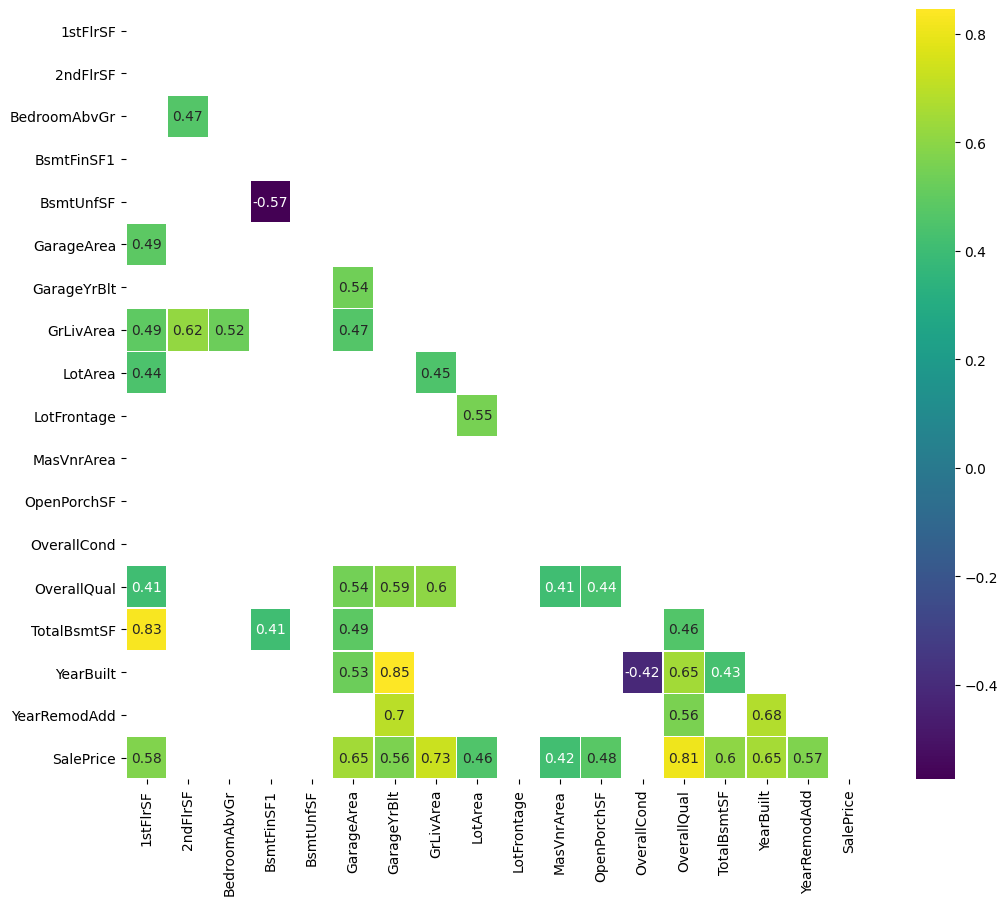



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



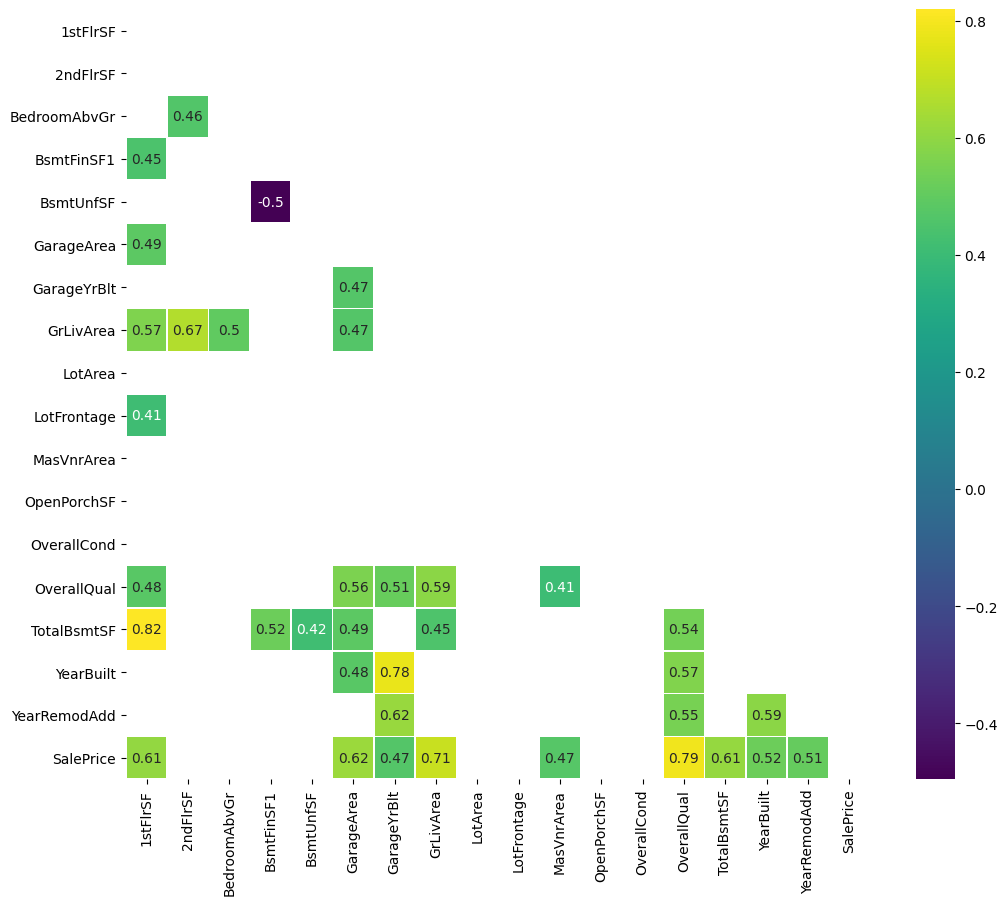



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



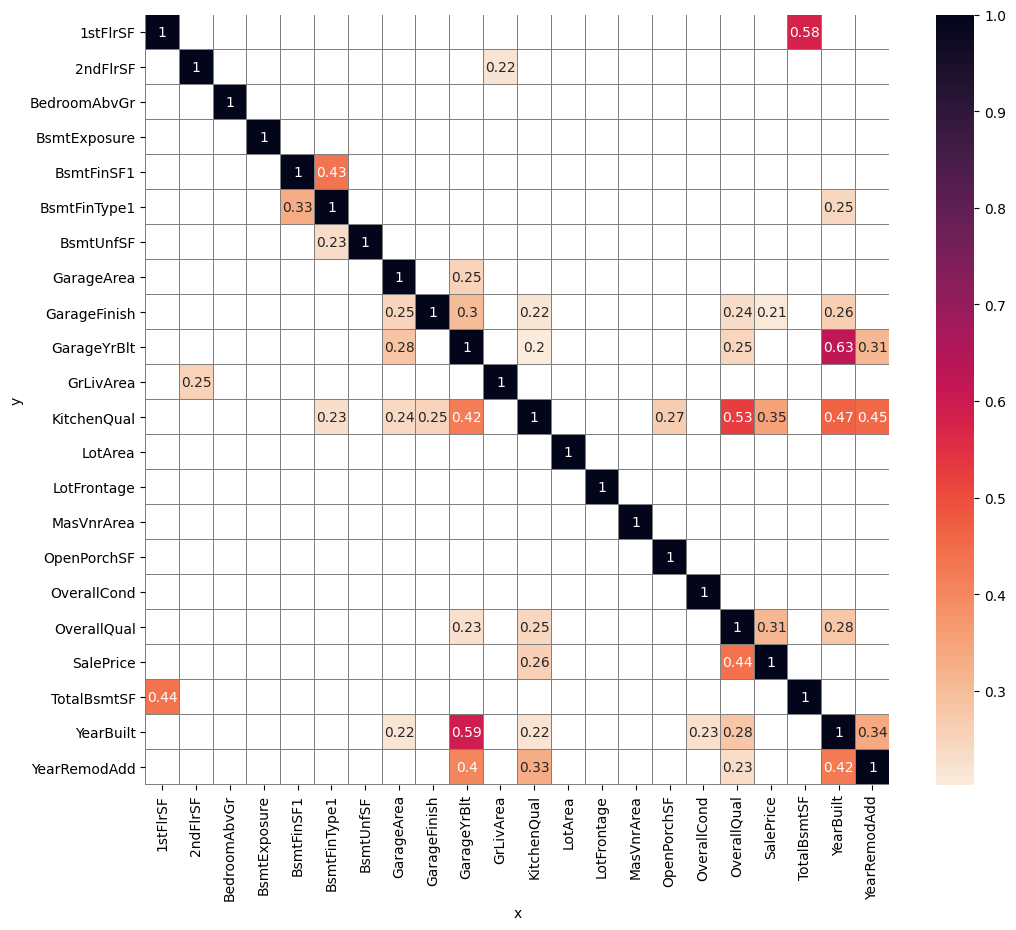

In [13]:
DisplayCorrAndPPS(df_corr_spearman = df_corr_spearman, 
                  df_corr_pearson = df_corr_pearson,               
                 pps_matrix = pps_matrix,
                 CorrThreshold = 0.4, PPS_Threshold = 0.2, 
                 figsize=(12,10), font_annot=10)

Examining from the Heatmaps, there is a positive correlation between the target feature `SalePrice` and various variables. 

* Spearman correlation shows a correlation between `SalePrice` with the below variables:
  * 1stFlrSF
  * GarageArea
  * GarageYrBlt
  * GrLivArea
  * LotArea
  * MasVnrArea
  * OpenPorchSF
  * OverallQual
  * TotalBsmtSF
  * YearBuilt
  * YearRemovdAdd
<br><br>
* Pearson correlation shows a correlation between `SalePrice` with the below variable:
  * 1stFlrSF
  * GarageArea
  * GarageYrBlt
  * GrLivArea
  * MasVnrArea
  * OverallQual
  * TotalBsmtSF
  * YearBuilt
  * YearRemodAdd
<br><br>
* According to the PPS heatmap, there are two variables (PPS > 0.2) that have a strong predictive power to `SalePrice`:
  * KitchenQual
  * OverallQual


* Based on both Correlation study and PPS study, we will focus on the following variables to evaluate their relationship with `SalePrice`.

* '1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'MasVnrArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'

In [20]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'MasVnrArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'MasVnrArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

---

# EDA on selected variables

We create a new dataframe with only the 10 variables that we selected above and saved under `vars_to_study` list with our target variable `SalePrice`.

In [21]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda

,1stFlrSF,GarageArea,GarageYrBlt,GrLivArea,KitchenQual,MasVnrArea,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,548,2003.0,1710,Gd,196.0,7,856,2003,2003,208500
1,1262,460,1976.0,1262,TA,0.0,6,1262,1976,1976,181500
2,920,608,2001.0,1786,Gd,162.0,7,920,2001,2002,223500
3,961,642,1998.0,1717,Gd,0.0,7,756,1915,1970,140000
4,1145,836,2000.0,2198,Gd,350.0,8,1145,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,953,460,1999.0,1647,TA,0.0,6,953,1999,2000,175000
1456,2073,500,1978.0,2073,TA,119.0,6,1542,1978,1988,210000
1457,1188,252,1941.0,2340,Gd,0.0,7,1152,1941,2006,266500
1458,1078,240,1950.0,1078,Gd,0.0,5,1078,1950,1996,142125


We plot the distribution 

[Errno 17] File exists: 'outputs/plots/var_plots/'


<Figure size 1200x500 with 0 Axes>

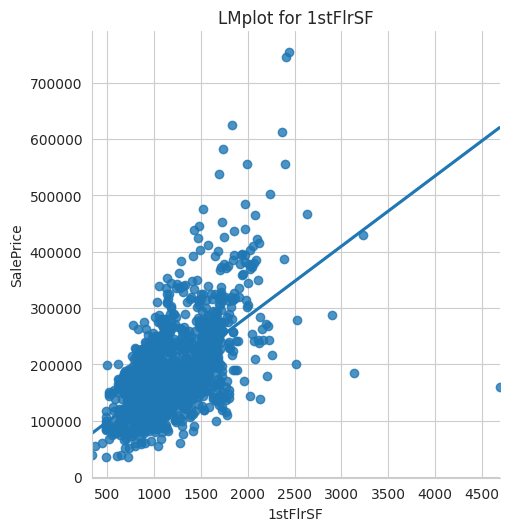

<Figure size 1200x500 with 0 Axes>

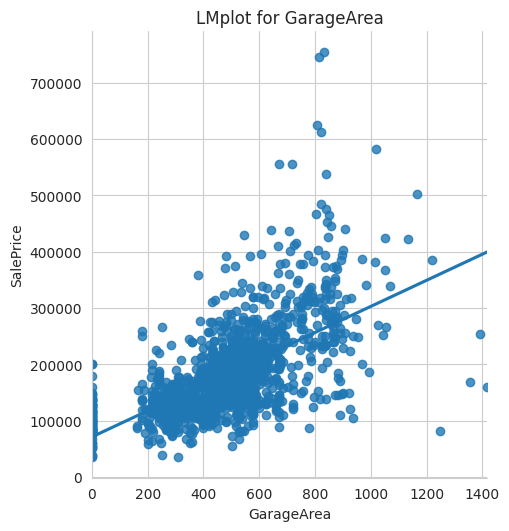

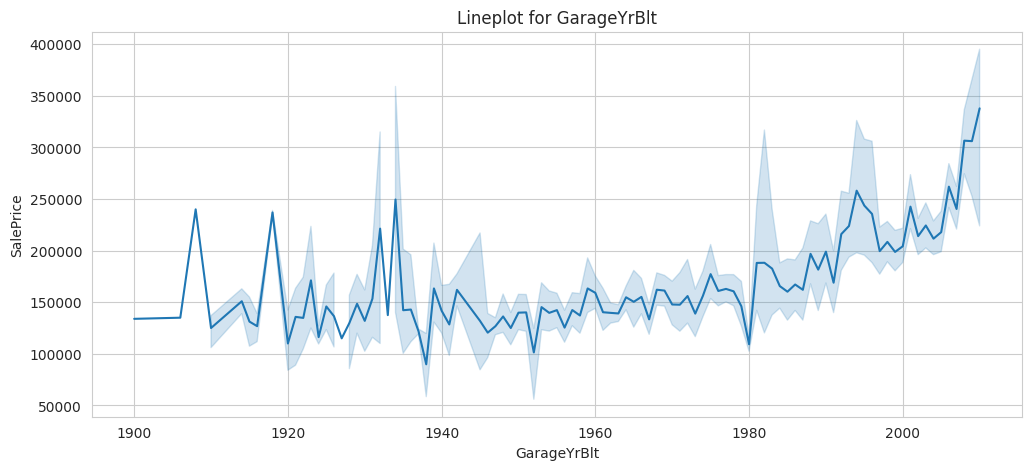

<Figure size 1200x500 with 0 Axes>

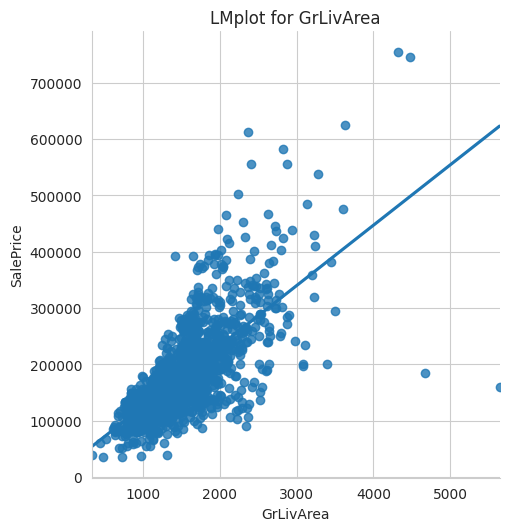

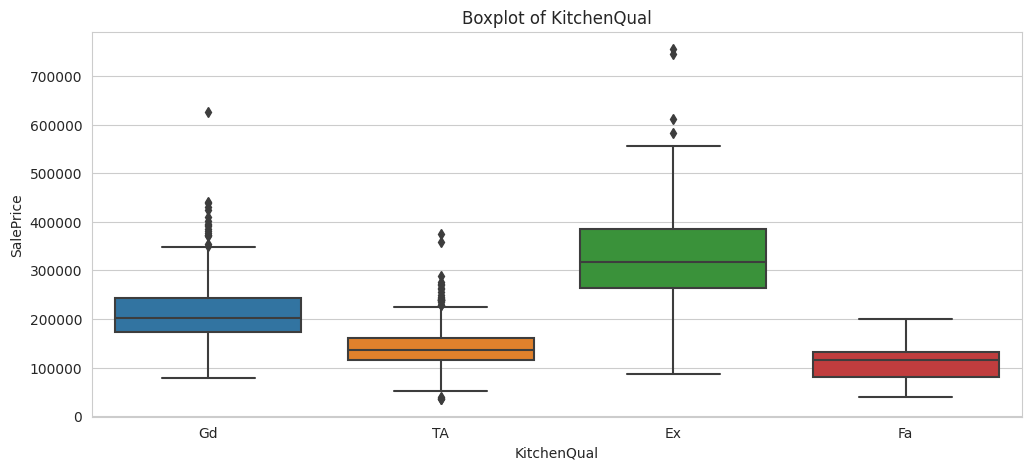

<Figure size 1200x500 with 0 Axes>

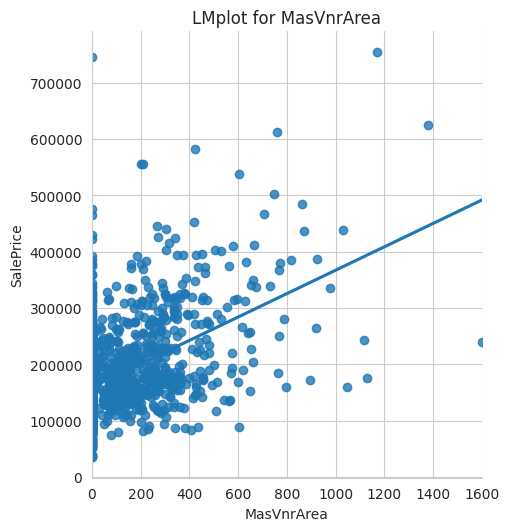

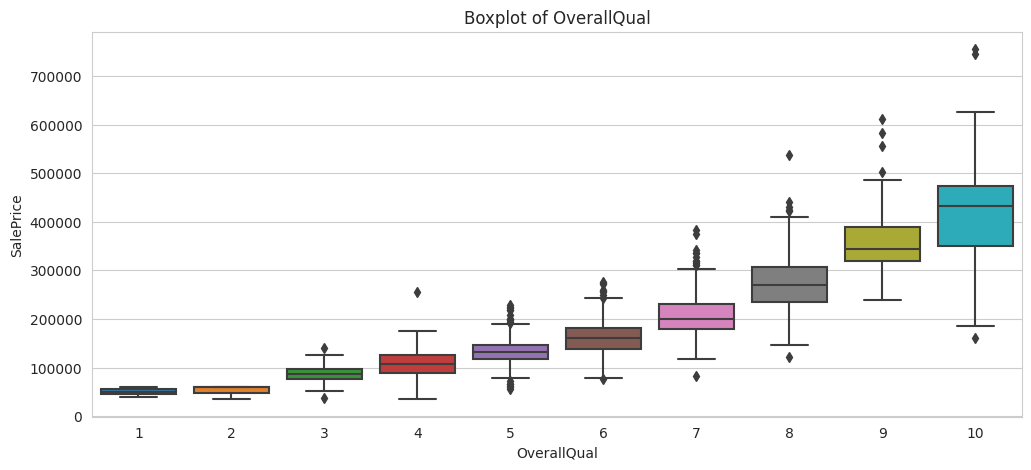

<Figure size 1200x500 with 0 Axes>

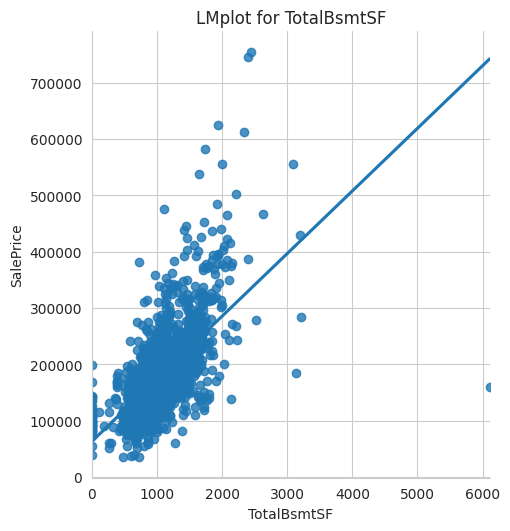

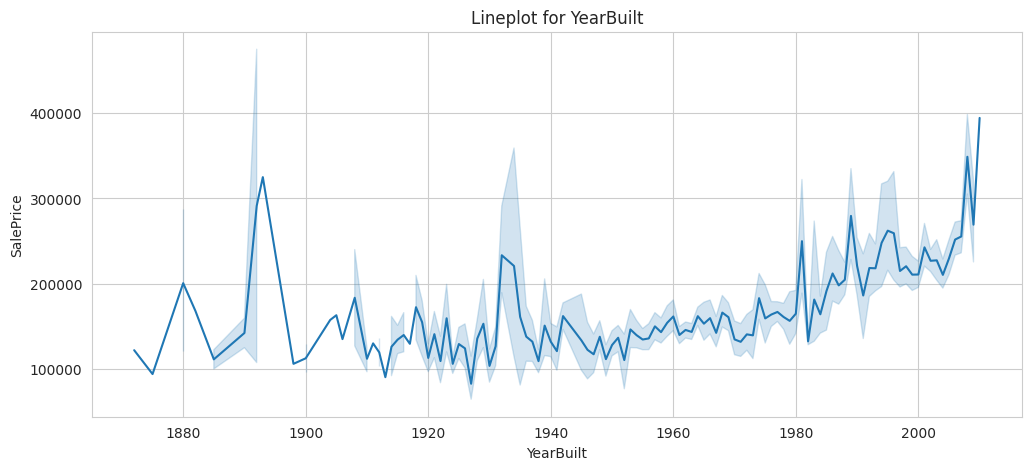

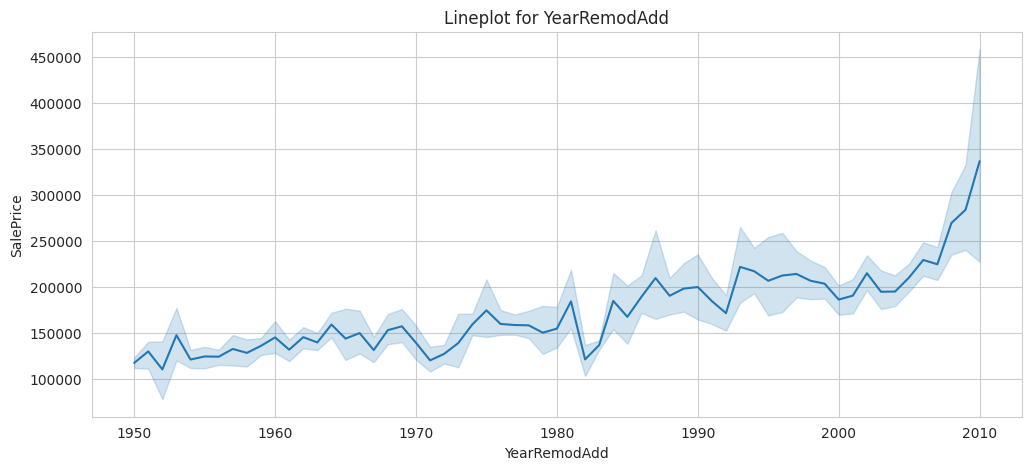

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('whitegrid')
numerical_vars = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'MasVnrArea', 'TotalBsmtSF']
categorical_vars = ['KitchenQual', 'OverallQual']
time_vars = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

target_var = 'SalePrice'
file_path = 'outputs/plots/var_plots/'


try:
    # create the folder
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

def plot_cat(df, col, target_var):
    """
    Function to create a boxplot for categorical
    variables and save the graphs to a folder
    """
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df_eda, x=col, y=target_var)
    plt.title(f"Boxplot of {col}")
    plt.savefig(f"{file_path}/boxplot_{col}.png")
    plt.show()

def plot_num(df, col, target_var):
    """
    Function to create a LMplot for numerical
    variables except time variables
    and save the graphs to a folder
    """
    plt.figure(figsize=(12, 5))
    sns.lmplot(data=df_eda, x=col, y=target_var, ci=None)
    plt.title(f"LMplot for {col}")
    plt.savefig(f"{file_path}/lmplot_{col}.png")
    plt.show()

def plot_time(df, col, target_var):
    """
    Function to create a line ploe for
    time variables and save the graphs to a folder
    """
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df_eda, x=col, y=target_var)
    plt.title(f"Lineplot for {col}")
    plt.savefig(f"{file_path}/lineplot_{col}.png")
    plt.show()

for col in df_eda.columns:
    if col in categorical_vars:
        plot_cat(df_eda, col, target_var)
        print("\n\n")
    elif col in numerical_vars:
        plot_num(df_eda, col, target_var)
        print("\n\n")
    elif col in time_vars:
        plot_time(df_eda, col, target_var)
        print("\n\n")
    else:
        pass


---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
